#### Import required libs

In [1]:
import sys
sys.path.append('/home/jupyter/app')

import pickle

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from src.io_utils import load_dataframe

#### Define constants

In [2]:
GS_DIR_FEATURES = "gs://pcqm4mv2/data/features"

#### Load datasets as pandas DataFrame

In [3]:
df_train = load_dataframe("train.csv", GS_DIR_FEATURES)

print("df_train shape:", df_train.shape)
df_train.head()

/opt/conda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


df_train shape: (3378606, 29)


,smiles,homolumogap,number_of_atoms,number_of_heavy_atoms,number_of_bonds,number_of_heavy_bonds,number_of_conformations,exact_mol_weight,average_mol_weight,heavy_mol_weight,...,number_of_B_atoms,number_of_C_atoms,number_of_N_atoms,number_of_O_atoms,number_of_F_atoms,number_of_Si_atoms,number_of_P_atoms,number_of_S_atoms,number_of_Cl_atoms,number_of_Br_atoms
idx,,,,,,,,,,,,,,,,,,,,,
0,O=C1[N]c2ccncc2[CH][C@@H]1c1ccc(cc1)C,3.047675,30,18,32,20,0,236.094963,236.274,224.178,...,0,15,2,1,0,0,0,0,0,0
1,COc1cc(OC)ccc1/C=C/N(C(=O)C)C,4.410966,34,17,34,17,0,235.120843,235.283,218.147,...,0,13,1,3,0,0,0,0,0,0
2,C=CCN(C(=O)C)/C=C/c1ccccc1C,4.639541,33,16,33,16,0,215.131014,215.296,198.160,...,0,14,1,1,0,0,0,0,0,0
3,C=CCN(C(=O)C)/C=C/c1ccccc1F,4.492600,30,16,30,16,0,219.105942,219.259,205.147,...,0,13,1,1,1,0,0,0,0,0
4,C=CCN(C(=O)C)/C=C/c1ccccc1Cl,4.612330,30,16,30,16,0,235.076392,235.714,221.602,...,0,13,1,1,0,0,0,0,1,0


In [4]:
df_val = load_dataframe("valid.csv", GS_DIR_FEATURES)

print("df_val shape:", df_val.shape)
df_val.head()

df_val shape: (73545, 29)


,smiles,homolumogap,number_of_atoms,number_of_heavy_atoms,number_of_bonds,number_of_heavy_bonds,number_of_conformations,exact_mol_weight,average_mol_weight,heavy_mol_weight,...,number_of_B_atoms,number_of_C_atoms,number_of_N_atoms,number_of_O_atoms,number_of_F_atoms,number_of_Si_atoms,number_of_P_atoms,number_of_S_atoms,number_of_Cl_atoms,number_of_Br_atoms
idx,,,,,,,,,,,,,,,,,,,,,
3378606,COc1ccccc1N[C@H](/C(=N\C(=N)O)/O)C,4.587840,32,17,32,17,0,237.111341,237.259,222.139,...,0,11,3,3,0,0,0,0,0,0
3378607,COc1ccccc1N[C@H](/C(=N\C(=N)O)/O)C,4.971520,32,17,32,17,0,237.111341,237.259,222.139,...,0,11,3,3,0,0,0,0,0,0
3378613,CC(/N=C(\N/N=C/1\C[C@H]2[C@@H]1CC=C2)/S)C,5.496700,32,15,33,16,0,223.114319,223.345,206.209,...,0,11,3,0,0,0,0,1,0,0
3378614,CC(/N=C(\N/N=C/1\C[C@H]2[C@@H]1CC=C2)/S)C,5.485815,32,15,33,16,0,223.114319,223.345,206.209,...,0,11,3,0,0,0,0,1,0,0
3378624,C/N=C(\c1cc2c(s1)ccc(c2)F)/O,4.748387,22,14,23,15,0,209.031063,209.245,201.181,...,0,10,1,1,1,0,0,1,0,0


#### Replace NaN with 0

In [5]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

In [6]:
print("Number of NaN in df_train:", df_train.isna().sum().sum())
print("Number of NaN in df_valn:", df_val.isna().sum().sum())

Number of NaN in df_train: 0
Number of NaN in df_valn: 0


#### Create X and y objects to train

In [7]:
X_train = df_train.drop(["smiles", "homolumogap"], axis=1).to_numpy()
y_train = df_train[["homolumogap"]].to_numpy()

print("X_train shape:", X_train.shape)
print(X_train)

print("y_train shape:", y_train.shape)
print(y_train)

X_train shape: (3378606, 27)
[[30. 18. 32. ...  0.  0.  0.]
 [34. 17. 34. ...  0.  0.  0.]
 [33. 16. 33. ...  0.  0.  0.]
 ...
 [34. 17. 34. ...  0.  0.  0.]
 [34. 17. 34. ...  0.  0.  0.]
 [35. 17. 36. ...  0.  0.  0.]]
y_train shape: (3378606, 1)
[[3.04767513]
 [4.41096552]
 [4.63954115]
 ...
 [5.06403876]
 [5.33615261]
 [5.4205079 ]]


In [8]:
X_val = df_val.drop(["smiles", "homolumogap"], axis=1).to_numpy()
y_val = df_val[["homolumogap"]].to_numpy()

print("X_val shape:", X_val.shape)
print(X_val)

print("y_val shape:", y_val.shape)
print(y_val)

X_val shape: (73545, 27)
[[32. 17. 32. ...  0.  0.  0.]
 [32. 17. 32. ...  0.  0.  0.]
 [32. 15. 33. ...  1.  0.  0.]
 ...
 [23. 13. 23. ...  0.  0.  0.]
 [ 8.  4.  7. ...  0.  2.  0.]
 [57. 34. 59. ...  0.  0.  0.]]
y_val shape: (73545, 1)
[[4.58783952]
 [4.97152005]
 [5.49669978]
 ...
 [4.95519322]
 [8.17974235]
 [3.3143467 ]]


#### Scale data with StandardScaler

In [9]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

In [10]:
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)

X_val = X_scaler.transform(X_val)
y_val = y_scaler.transform(y_val)

#### Save scalers locally and to GCS

In [11]:
with open("../../artifacts/sc_x_features.pkl", "wb") as f:
    pickle.dump(X_scaler, f)
    
!gsutil cp ../../artifacts/sc_x_features.pkl gs://pcqm4mv2/artifacts/sc_x_features.pkl

Copying file://../../artifacts/sc_x_features.pkl [Content-Type=application/octet-stream]...
/ [1 files][  1.2 KiB/  1.2 KiB]                                                
Operation completed over 1 objects/1.2 KiB.                                      


In [12]:
with open("../../artifacts/sc_y.pkl", "wb") as f:
    pickle.dump(y_scaler, f)

!gsutil cp ../../artifacts/sc_y.pkl gs://pcqm4mv2/artifacts/sc_y.pkl    

Copying file://../../artifacts/sc_y.pkl [Content-Type=application/octet-stream]...
/ [1 files][  559.0 B/  559.0 B]                                                
Operation completed over 1 objects/559.0 B.                                      


#### Train Model

##### Number of features to use in input shape

In [13]:
N_FEATURES = X_train.shape[1]
N_FEATURES

27

##### Function to create the best model

In [14]:
def create_model(
    n_hidden_layers=4, 
    n_neurons=128, 
    dropout_rate=0.1,
    regularizer=None,
    input_shape=(N_FEATURES, )
):
    model = Sequential()
    model.add(Dense(n_neurons, activation="relu", input_shape=input_shape, kernel_regularizer=regularizer))
    
    for _ in range(n_hidden_layers-1):
        model.add(Dropout(dropout_rate))
        model.add(Dense(n_neurons, activation="relu", kernel_regularizer=regularizer))
    

    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer="adam", loss="mae")

    return model

In [20]:
regressor = create_model()

##### Start training

In [ ]:
history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=256, use_multiprocessing=True)

Epoch 1/100
13198/13198 [==============================] - 35s 3ms/step - loss: 0.3810 - val_loss: 0.3910
Epoch 2/100
13198/13198 [==============================] - 33s 3ms/step - loss: 0.3505 - val_loss: 0.3776
Epoch 3/100
13198/13198 [==============================] - 34s 3ms/step - loss: 0.3429 - val_loss: 0.3778
Epoch 4/100
13198/13198 [==============================] - 34s 3ms/step - loss: 0.3389 - val_loss: 0.3715
Epoch 5/100
13198/13198 [==============================] - 33s 3ms/step - loss: 0.3362 - val_loss: 0.3784
Epoch 6/100
13198/13198 [==============================] - 34s 3ms/step - loss: 0.3341 - val_loss: 0.3631
Epoch 7/100
13198/13198 [==============================] - 34s 3ms/step - loss: 0.3328 - val_loss: 0.3651
Epoch 8/100
13198/13198 [==============================] - 34s 3ms/step - loss: 0.3316 - val_loss: 0.3623
Epoch 9/100
13198/13198 [==============================] - 34s 3ms/step - loss: 0.3305 - val_loss: 0.3600
Epoch 10/100
13198/13198 [====================

#### Save model to GCS

In [28]:
regressor.save("../../artifacts/best_model")
!gsutil cp ../../artifacts/best_model gs://pcqm4mv2/artifacts/best_model   


INFO:tensorflow:Assets written to: ../../artifacts/best_model/assets
Omitting directory "file://../../artifacts/best_model". (Did you mean to do cp -r?)
CommandException: No URLs matched. Do the files you're operating on exist?


#### Save training history to GCS

In [29]:
with open("../../artifacts/history_best_model.pkl", "wb") as f:
    pickle.dump(history, f)

!gsutil cp ../../artifacts/history_best_model.pkl gs://pcqm4mv2/artifacts/history_best_model.pkl   

INFO:tensorflow:Assets written to: ram://25e08a2e-49ed-447a-8978-9f37855b95bf/assets
Copying file://../../artifacts/history_best_model.pkl [Content-Type=application/octet-stream]...
/ [1 files][822.4 KiB/822.4 KiB]                                                
Operation completed over 1 objects/822.4 KiB.                                    


#### Get MAE for validation set

In [30]:
y_val_pred = regressor.predict(X_val)
y_val_pred

array([[-0.40599832],
       [-0.40599832],
       [-0.4566862 ],
       ...,
       [ 0.02913779],
       [ 1.8598659 ],
       [-1.3275093 ]], dtype=float32)

In [31]:
y_val_inv = y_scaler.inverse_transform(y_val)
y_val_pred_inv = y_scaler.inverse_transform(y_val_pred)

In [32]:
mae_result = mean_absolute_error(y_val_inv, y_val_pred_inv)
print("MAE Result:", mae_result)

MAE Result: 0.4075833376080264


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

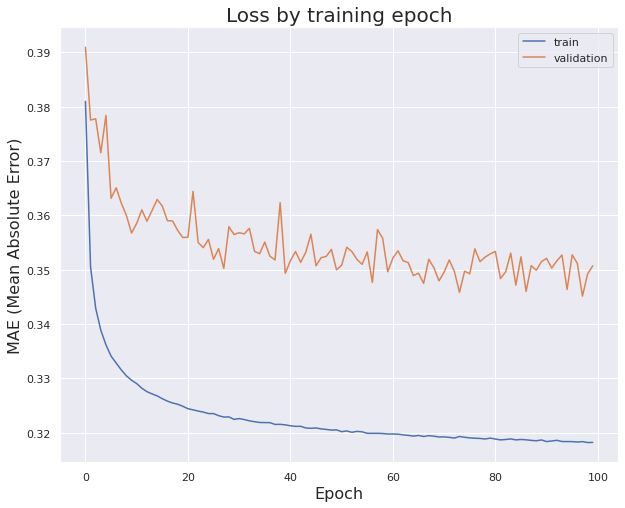

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(history.history["loss"], label="train")
ax.plot(history.history["val_loss"], label="validation")

ax.set_title("Loss by training epoch", fontsize=20)
ax.set_ylabel("MAE (Mean Absolute Error)", fontsize=16)
ax.set_xlabel("Epoch", fontsize=16)
ax.legend()